# Random motion and estimation of diffusion coefficient by MSD
### Sabine Fischer, Winter 2024

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

## Define functions

In [4]:
def random_walk(D = 0.5,T = 100,dt = 0.01):
    nTimeSteps = int(T/dt)
    x = np.zeros((nTimeSteps,2))
    for i in range(1,  nTimeSteps):
        x[i] = x[i-1] + np.sqrt(dt)*np.sqrt(2*D)*np.random.randn(1,2)
    return x

In [5]:
def squaredNorm(x):
    N = len(x)
    sNorm = np.zeros(N)
    for t in range(N):
        sNorm[t] = (np.linalg.norm(x[t] - x[0]))**2
    return sNorm

## One agent

In [6]:
trajectory=random_walk(D = 1e-3,T = 5,dt = 0.01)

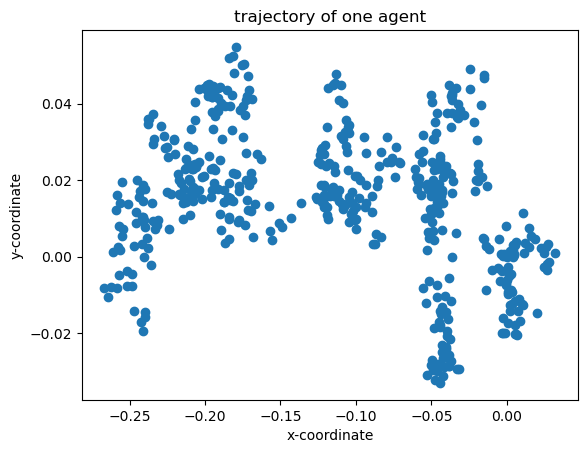

In [7]:
plt.scatter(trajectory[:,0],trajectory[:,1])
plt.xlabel("x-coordinate")
plt.ylabel("y-coordinate")
plt.title("trajectory of one agent")
plt.show()

## Multiple agents

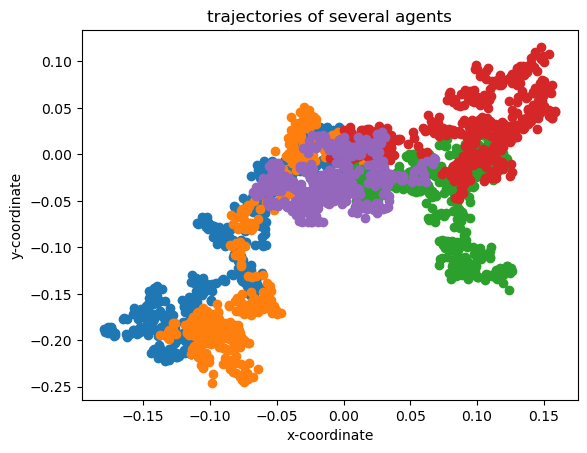

In [8]:
for i in range(5):
    trajectory=random_walk(D = 1e-3,T = 5,dt = 0.01)
    
    plt.scatter(trajectory[:,0],trajectory[:,1])
    plt.xlabel("x-coordinate")
    plt.ylabel("y-coordinate")
    plt.title("trajectories of several agents")

plt.show()

## Mean squared displacement

The Mean squared displacement (MSD) at time $t$ is defined as
$$MSD(t)=\frac{1}{n}\sum_{i=1}^n|x_i(t)-x_i(0)|^2,$$ 
where $n$ is the number of agents, the vector $x_i(t)$ is the position of agent $i$ at time $t$ and the vector $x_i(0)$ the position of agent $i$ at time $0$.

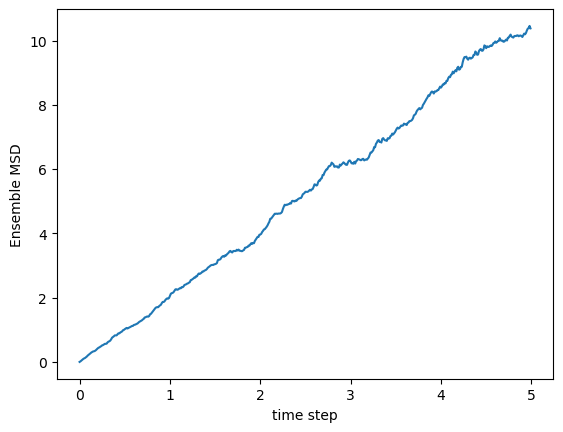

In [34]:
T = 5
dt = 0.01
DiffConst=0.5
sNorm_ensemble = np.zeros(int(T/dt))
numAgents = 200
for i in range(numAgents):
    trajectory=random_walk(D = DiffConst,T = T,dt = dt)
    sNorm_ensemble += squaredNorm(trajectory)
MSD = sNorm_ensemble/numAgents
plt.plot([i*dt for i in range(int(T/dt))],MSD)
plt.xlabel("time step")
plt.ylabel("Ensemble MSD")
plt.show()

Die Form der Kurve für MSD gibt die Art der Bewegung an:

Von Jkrieger (Diskussion) 07:55, 10 July 2015 (UTC) - Eigenes Werk, CC BY-SA 3.0, https://commons.wikimedia.org/w/index.php?curid=41477673

## Linear Regression to determine diffusion coefficient

In [10]:
def line(x,a,b):
    return a*x+b

In [13]:
xValues=np.linspace(0,5,100)

Mean squared displacement in n-dimensional Brownian motion is $MSD(t)=2nDt$.(https://en.wikipedia.org/wiki/Mean_squared_displacement)

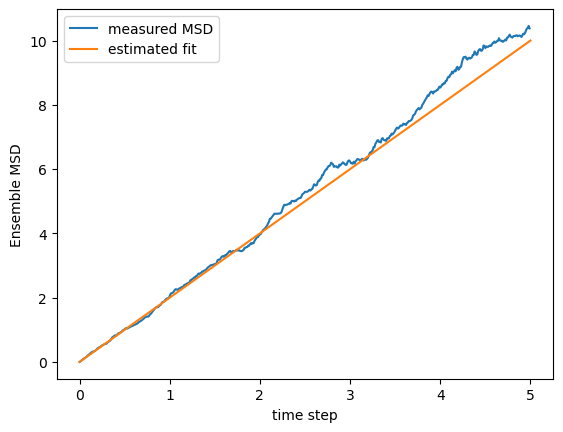

In [42]:
plt.plot([i*dt for i in range(int(T/dt))],MSD,label="measured MSD")
plt.plot(xValues,line(xValues,4*DiffConst,0),label="estimated fit")
plt.legend()
plt.xlabel("time")
plt.ylabel("Ensemble MSD")
plt.show()

In [43]:
popt, pcov = opt.curve_fit(line, [i*dt for i in range(int(T/dt))],MSD, [4*DiffConst,0]) 

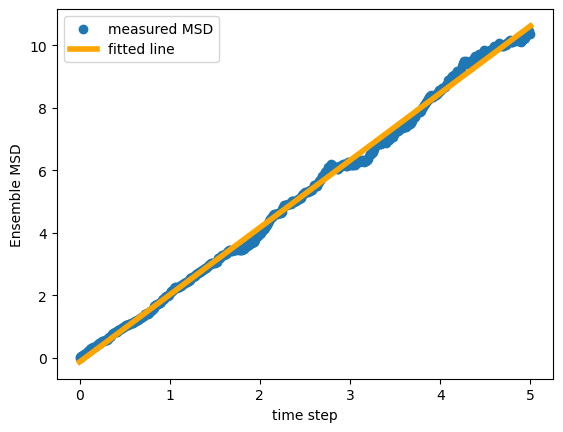

In [49]:
plt.scatter([i*dt for i in range(int(T/dt))],MSD,label='measured MSD')
plt.plot(xValues,line(xValues,*popt),color='orange',linewidth=4,label='fitted line')
plt.legend()
plt.xlabel("time")
plt.ylabel("Ensemble MSD")
plt.show()

In [46]:
D_fitted=popt[0]/(2*2)
D_fitted

0.5380414556025659

In [47]:
DiffConst

0.5